In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


## Turistic Data from Maczek
First massage the data, then try phi-K

In [1]:
import pandas as pd
import xlrd
import numpy as np


In [2]:
df = pd.read_excel("./data/Copy of wyniki baza danych 5 dec 2018.xls", 
header=0, convert_float=True)
df.head()


1a 1b 1c  1d komfort 1f 1g 1h zabytki 1j ...   M2a  M2b       M3  M4a  m4b  \
0  4  3   4  4       4  3  4  5       4  3 ...   NaN    1  ukraina  NaN    1   
1  3  4   3  2       4  2  4  2       2  5 ...   NaN    1  ukraina  NaN  NaN   
2  3  4   3  5       4  2  1  5       5  3 ...     1  NaN  ukraina  NaN  NaN   
3  4  4   3  4       5  4  2  4       3  4 ...   NaN    1  ukraina  NaN    1   
4  4  5   5  5       5  3  4  4       4  5 ...     1  NaN  ukraina  NaN  NaN   

   M4c  M5a  M5b  M5c  M5d  
0  NaN  NaN  NaN    1  NaN  
1    1  NaN  NaN    1  NaN  
2    1  NaN  NaN    1  NaN  
3  NaN  NaN    1  NaN  NaN  
4    1  NaN    1  NaN  NaN  

[5 rows x 135 columns]

In [3]:
df = df[df.komfort != 'komfort']
df = df.applymap(lambda x: x.strip() if type(x) is str else x)
df=df.apply(pd.to_numeric, errors='ignore')
df.dropna(axis='columns', how="all", inplace=True)
df.dropna(axis='rows', how="all", inplace=True)
df.shape


(410, 130)

In [4]:
import phik
from phik import resources, report

In [5]:
df.corr()

1a        1b       1c         1d   komfort  \
1a                  1.000000  0.151584  0.057208  0.056331 -0.010512   
1b                  0.151584  1.000000  0.017273  0.175803  0.103302   
1c                  0.057208  0.017273  1.000000  0.178672  0.083887   
1d                  0.056331  0.175803  0.178672  1.000000  0.186159   
komfort            -0.010512  0.103302  0.083887  0.186159  1.000000   
1f                 -0.059544  0.042354  0.181139  0.081064  0.231871   
1g                  0.105570  0.073058  0.044946 -0.060148  0.252205   
1h                  0.146753  0.021527  0.111968  0.081707  0.054215   
zabytki             0.218753  0.064548  0.046839  0.050507 -0.016002   
1j                  0.036052  0.196265 -0.010674  0.169971  0.491674   
1k                  0.078247 -0.030846  0.532636  0.191428  0.066108   
1l                  0.019100  0.111404 -0.055242  0.030255  0.224637   
1m                  0.050493  0.261146  0.091139  0.145018  0.294204   
bezpieczeństwo      0.140501  0.168994  0.061341  0.172372  0.318849   
1o                  0.030336  0.113401  0.117523  0.232017  0.274500   
1p                 -0.104850  0.064858  0.205143  0.157656  0.152928   
1r                 -0.031941  0.020317  0.228723  0.305869  0.049593   
2a                  0.104405  0.054654  0.083659 -0.020991  0.067632   
2c                  0.161999  0.215487  0.071613  0.226282  0.087287   
2d                  0.099376  0.099972  0.167744  0.028712  0.138186   
wiedza              0.056324  0.044435  0.128111  0.101666 -0.004265   
2f                  0.051004 -0.066867  0.028052 -0.016703  0.019376   
2g                 -0.007825  0.063525  0.134029  0.160936  0.062557   
2h                  0.136211  0.034424  0.191759  0.043806  0.070583   
2i                  0.022351  0.036226 -0.054329  0.008612  0.005309   
3a                  0.124363  0.208475  0.059623  0.144748  0.139219   
3b                  0.071409  0.118757  0.124691  0.135533  0.208222   
3c                  0.422758  0.099765  0.189042  0.155468  0.107847   
3d                 -0.045884 -0.064243  0.142168 -0.019128  0.065801   
3e                  0.058963  0.141070  0.040639  0.143163  0.282227   
...                      ...       ...       ...       ...       ...   
8p                  0.019777  0.068607  0.059284 -0.035451  0.164779   
8r                  0.107548  0.070807 -0.014612  0.009353  0.081188   
8s                  0.016899  0.034953  0.117220  0.048529  0.050559   
bardziej uważnie    0.047376  0.020332 -0.001890 -0.088848  0.041615   
8u                  0.035302  0.063674  0.111823  0.012294  0.037439   
8w                  0.032538  0.288586 -0.045838 -0.026619 -0.000955   
8x                  0.039060  0.080330  0.155096  0.034179  0.036051   
8y                 -0.048384  0.075445  0.029502  0.071881  0.043368   
8z                  0.138208 -0.001385 -0.027208 -0.032480  0.072856   
najniższa cena      0.045341  0.117506  0.030168 -0.046172 -0.067818   
9a                 -0.038097  0.083341 -0.016615  0.060544  0.043032   
9b                  0.069863  0.074756 -0.022334  0.140853 -0.001882   
9c                  0.060562  0.087035 -0.021255  0.170347  0.092824   
9d                 -0.060754  0.050356 -0.037386  0.057569 -0.030328   
9e                  0.099745  0.097418  0.130948  0.004265  0.002405   
rozumieją potrzeby  0.063726  0.069108  0.117478  0.049694  0.001997   
9g                  0.074468  0.109156  0.148604  0.155478  0.024952   
9h                  0.044057 -0.041425  0.138834  0.114292 -0.038502   
9i                 -0.009484 -0.011455  0.060053 -0.011571  0.064304   
9j                  0.033655 -0.007347  0.059639 -0.035274  0.022585   
udzielam opinii     0.024105  0.016586  0.154709 -0.052831  0.094414   
M1                  0.107917  0.001835  0.072712  0.090202 -0.107649   
M2a                      NaN       NaN       NaN       NaN       NaN   
M2b                      NaN       NaN       NaN       NaN       N

In [6]:
df.phik_matrix()

interval_cols not set, guessing: ['1a', '1b', '1c ', '1d', 'komfort', '1f', '1g', '1h', 'zabytki', '1j', '1k', '1l', '1m', 'bezpieczeństwo', '1o', '1p', '1r', '2a', '2c', '2d', 'wiedza', '2f', '2g', '2h', '2i', '3a', '3b', '3c', '3d', '3e', '3f', '3h', '3i', '3j', '3k', '3l', '3m', '4a', '4b', '4c', '4d', '4e', 'czystość', '4g', '4h', '4i', '4j', '4k', '5a', '5b', '5c', '5d', '5e', '5g', '5h', '5i', '5j', '5k', '6a', '6b', '6c', '6d', '6e', 'atmosfera', '6g', '6h', '6i', '6j', '6k', '7a', '7b', '7c', '7d', '7f', '7g', '7h', '7i', '8a', '8b', '8c', 'czuję się zagubuiny', '8f', '8g', '8h', '8i', '8j', '8k', '8l', 'podróżuję by', '8n', '8o', '8p', '8r', '8s', 'bardziej uważnie', '8u', '8w', '8x', '8y', '8z', 'najniższa cena', '9a', '9b', '9c', '9d', '9e', 'rozumieją potrzeby', '9g', '9h', '9i', '9j', 'udzielam opinii', 'M1', 'M2a', 'M2b', 'M4a', 'm4b', 'M4c', 'M5a', 'M5b', 'M5c']


/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/data_quality.py:64: UserWarning: Not enough unique value for variable M2a for analysis 1. Dropping this column
  .format(col, df[col].nunique()))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/data_quality.py:64: UserWarning: Not enough unique value for variable M2b for analysis 1. Dropping this column
  .format(col, df[col].nunique()))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/data_quality.py:64: UserWarning: Not enough unique value for variable M4a for analysis 1. Dropping this column
  .format(col, df[col].nunique()))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/data_quality.py:64: UserWarning: Not enough unique value for variable m4b for analysis 1. Dropping this column
  .format(col, df[col].nunique()))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/data_quality.py:64: UserWarning: Not enough unique value

/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too few unique values for variable 6e (1) or inne.5 (3) to calculate phik
  c0, datahist.shape[0], c1, datahist.shape[1]))


/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too few unique values for variable M3 (1) or inne.3 (3) to calculate phik
  c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too few unique values for variable atmosfera (1) or inne.1 (8) to calculate phik
  c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too few unique values for variable bezpieczeństwo (1) or inne.5 (3) to calculate phik
  c0, datahist.shape[0], c1, datahist.shape[1]))


/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too few unique values for variable czystość (1) or inne.5 (3) to calculate phik
  c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too few unique values for variable inne (1) or inne.2 (1) to calculate phik
  c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too few unique values for variable inne (0) or inne.3 (0) to calculate phik
  c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too few unique values for variable inne (1) or inne.5 (1) to calculate phik
  c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/phik.py:106: UserWarning: Too fe

var2                       1a        1b       1c         1d        1f  \
var1                                                                    
1a                   1.000000  0.473062  0.169193  0.000000  0.123680   
1b                   0.473062  1.000000  0.000000  0.220199  0.179979   
1c                   0.169193  0.000000  1.000000  0.227919  0.224270   
1d                   0.000000  0.220199  0.227919  1.000000  0.123470   
1f                   0.123680  0.179979  0.224270  0.123470  1.000000   
1g                   0.361648  0.016569  0.211871  0.103159  0.303463   
1h                   0.158321  0.225269  0.250387  0.196637  0.123220   
1j                   0.184578  0.257670  0.056512  0.309867  0.314208   
1k                   0.257466  0.000000  0.719557  0.418826  0.180596   
1l                   0.192507  0.000000  0.000000  0.274571  0.367804   
1m                   0.000000  0.405639  0.024082  0.322149  0.466156   
1o                   0.209963  0.230692  0.107119  0.358883  0.185957   
1p                   0.059931  0.124682  0.285611  0.277512  0.558436   
1r                   0.000000  0.000000  0.322122  0.421372  0.247379   
2a                   0.292282  0.111441  0.224926  0.188330  0.384463   
2b                   0.000000  0.000000  0.149052  0.191022  0.000000   
2c                   0.312829  0.332804  0.125250  0.300930  0.321315   
2d                   0.167199  0.173555  0.377874  0.145440  0.221232   
2f                   0.123075  0.133331  0.000000  0.103314  0.311306   
2g                   0.159065  0.053543  0.141679  0.236771  0.161361   
2h                   0.332892  0.105010  0.252888  0.000000  0.378737   
2i                   0.155876  0.000000  0.000000  0.164055  0.000000   
3a                   0.330949  0.472982  0.080962  0.222314  0.131486   
3b                   0.102645  0.152969  0.219264  0.229167  0.160657   
3c                   0.582903  0.238978  0.309873  0.234072  0.171002   
3d                   0.146740  0.152872  0.156591  0.276060  0.441781   
3e                   0.152571  0.231950  0.000000  0.285745  0.607329   
3f                   0.130959  0.751453  0.111712  0.271319  0.237198   
3h                   0.227683  0.218590  0.187309  0.225442  0.312664   
3i                   0.042144  0.000000  0.309424  0.438084  0.258744   
...                       ...       ...       ...       ...       ...   
8z                   0.288338  0.068871  0.175397  0.000000  0.245801   
9a                   0.000000  0.176890  0.103240  0.241589  0.000000   
9b                   0.168488  0.000000  0.000000  0.243151  0.198944   
9c                   0.300985  0.134669  0.000000  0.226358  0.000000   
9d                   0.129316  0.260681  0.099183  0.166337  0.060839   
9e                   0.185315  0.061806  0.119881  0.000000  0.311920   
9g                   0.177755  0.021097  0.224866  0.000000  0.244573   
9h                   0.166079  0.064526  0.144657  0.071432  0.284673   
9i                   0.158828  0.000000  0.073794  0.000000  0.294815   
9j                   0.157352  0.000000  0.171152  0.120948  0.227563   
M1                   0.000000  0.000000  0.022188  0.000000  0.145476   
M3                   0.060273  0.092460  0.630191  0.201723  0.224175   
atmosfera            0.294694  0.000000  0.139478  0.264573  0.029201   
bardziej uważnie     0.000000  0.171599  0.000000  0.235533  0.288119   
bezpieczeństwo       0.316178  0.190001  0.160786  0.305007  0.243447   
czuję się zagubuiny  0.174679  0.134114  0.238090  0.163619  0.314308   
czystość             0.351196  0.000000  0.000000  0.368223  0.114120   
inne                 0.324076  0.640916  0.000000  0.000000  0.572679   
inne.1               0.513881  0.691549  0.709410  0.867765  0.000000   
inne.2               0.000000  0.081350  0.000000  0.000000  0.000000   
inne.3               0.000000  0.000000  0.570520  0.858101  1.000000   
inne.4               0.000000  0.000000  0.160873  0.74166

interval_cols not set, guessing: ['1a', '1b', '1c ', '1d', 'komfort', '1f', '1g', '1h', 'zabytki', '1j', '1k', '1l', '1m', 'bezpieczeństwo', '1o', '1p', '1r', '2a', '2c', '2d', 'wiedza', '2f', '2g', '2h', '2i', '3a', '3b', '3c', '3d', '3e', '3f', '3h', '3i', '3j', '3k', '3l', '3m', '4a', '4b', '4c', '4d', '4e', 'czystość', '4g', '4h', '4i', '4j', '4k', '5a', '5b', '5c', '5d', '5e', '5g', '5h', '5i', '5j', '5k', '6a', '6b', '6c', '6d', '6e', 'atmosfera', '6g', '6h', '6i', '6j', '6k', '7a', '7b', '7c', '7d', '7f', '7g', '7h', '7i', '8a', '8b', '8c', 'czuję się zagubuiny', '8f', '8g', '8h', '8i', '8j', '8k', '8l', 'podróżuję by', '8n', '8o', '8p', '8r', '8s', 'bardziej uważnie', '8u', '8w', '8x', '8y', '8z', 'najniższa cena', '9a', '9b', '9c', '9d', '9e', 'rozumieją potrzeby', '9g', '9h', '9i', '9j', 'udzielam opinii', 'M1', 'M2a', 'M2b', 'M4a', 'm4b', 'M4c', 'M5a', 'M5b', 'M5c']


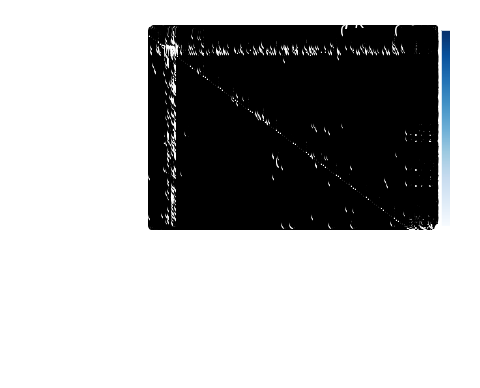

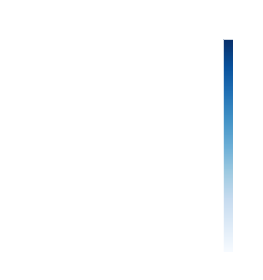

/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable 6e (1) or inne.5 (3) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[1]))


/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable M3 (1) or inne.3 (3) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable atmosfera (1) or inne.1 (8) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable bezpieczeństwo (1) or inne.5 (3) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable czystość (1) or inne.5 (3) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[

/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable inne.1 (0) or inne.2 (0) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable inne.1 (0) or inne.3 (0) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable inne.1 (1) or inne.4 (1) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[1]))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/significance.py:284: UserWarning: Too few unique values for variable inne.1 (1) or inne.5 (1) to calculate significance
  .format(c0, datahist.shape[0], c1, datahist.shape[1]))
/hom

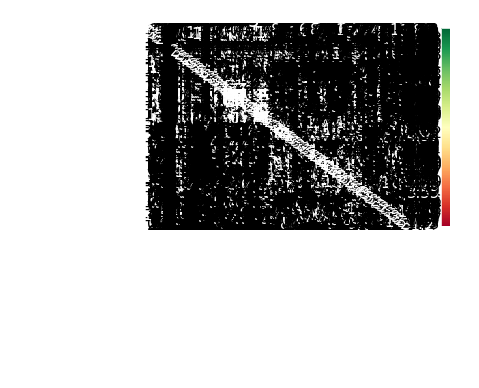

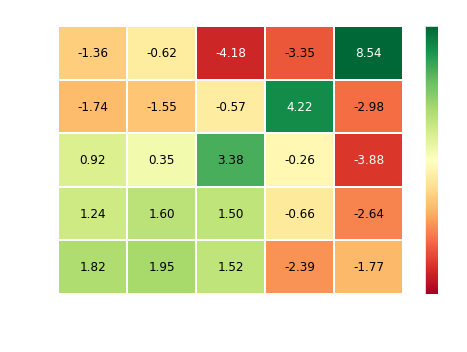

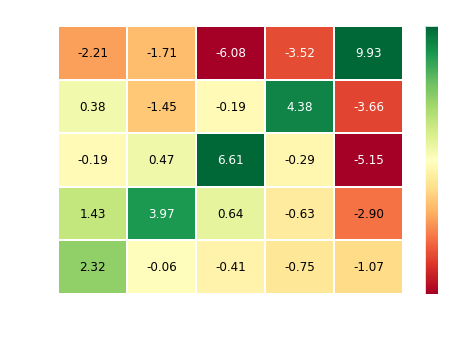

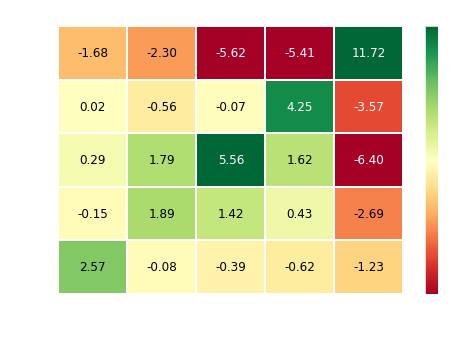

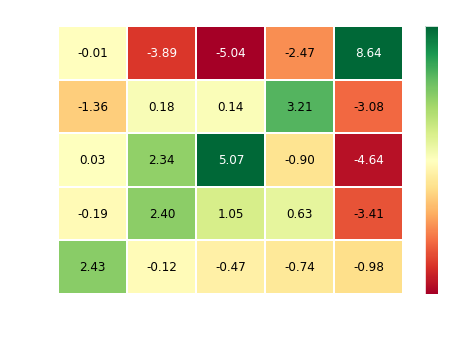

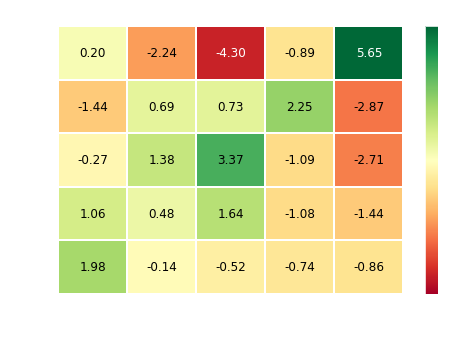

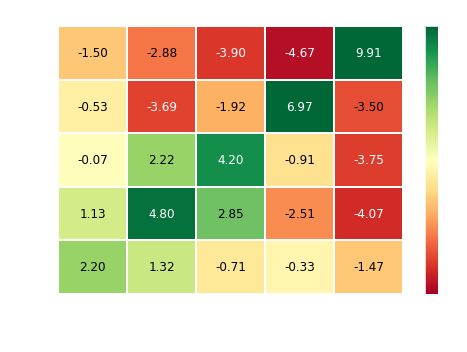

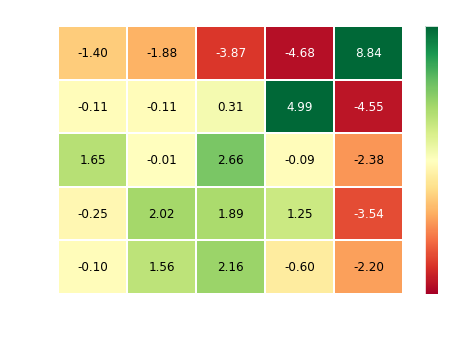

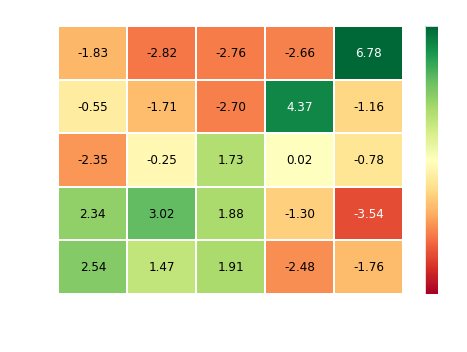

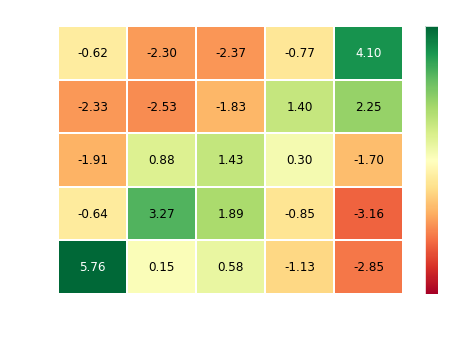

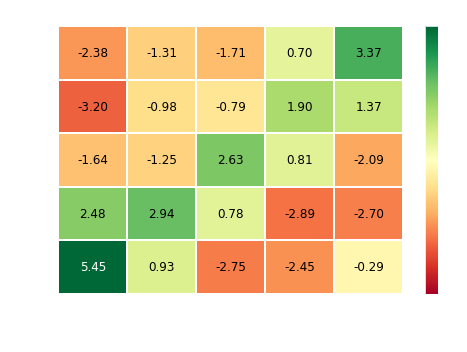

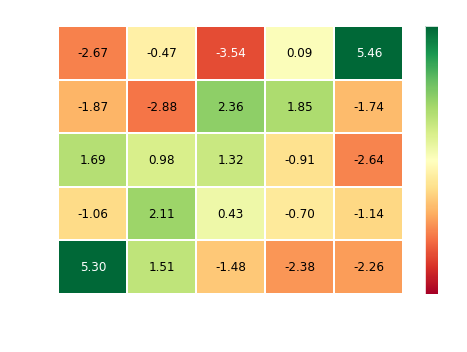

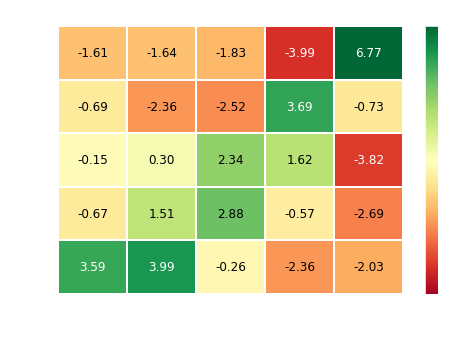

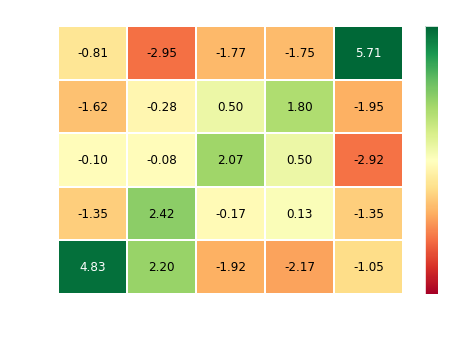

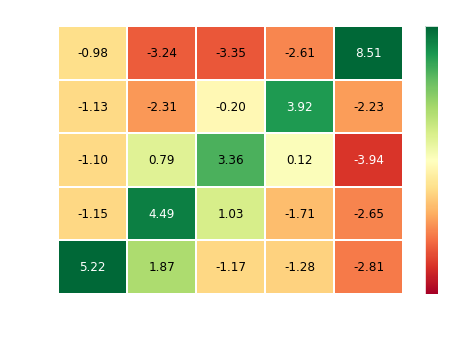

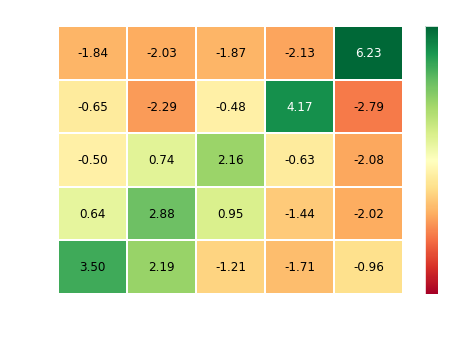

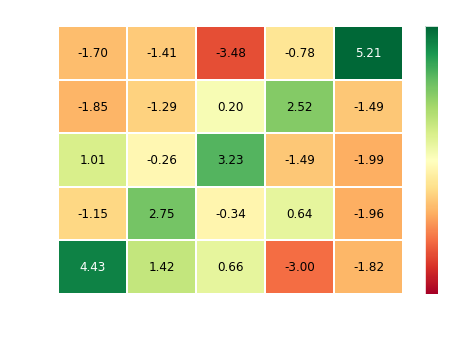

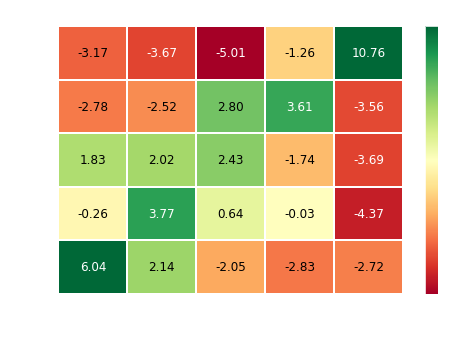

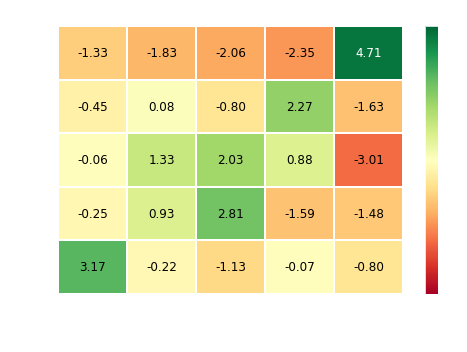

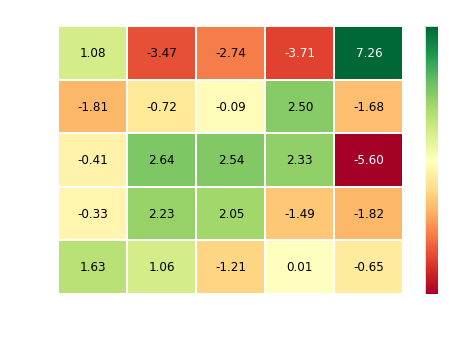

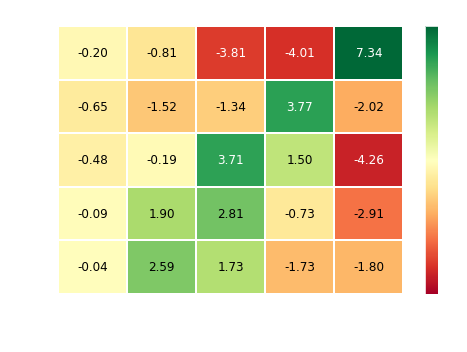

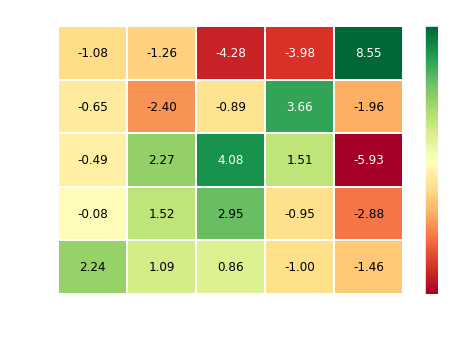

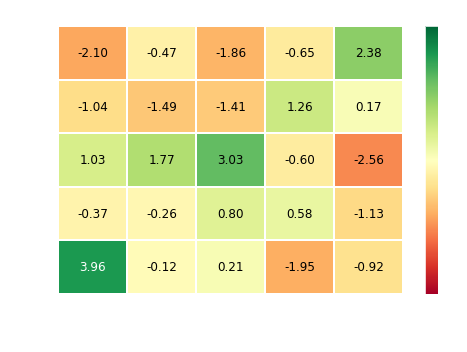

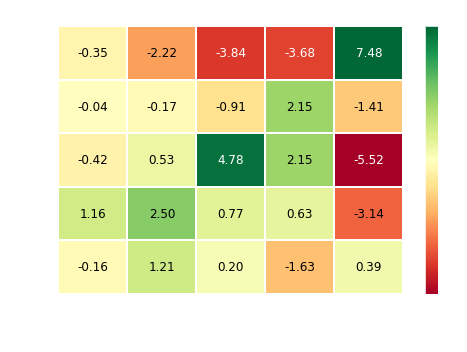

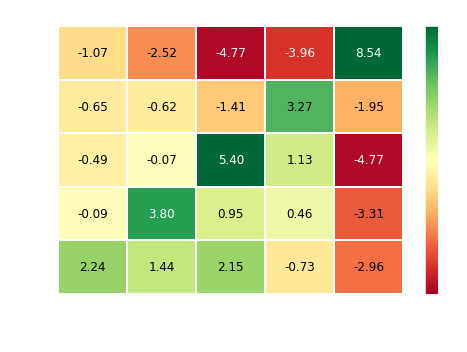

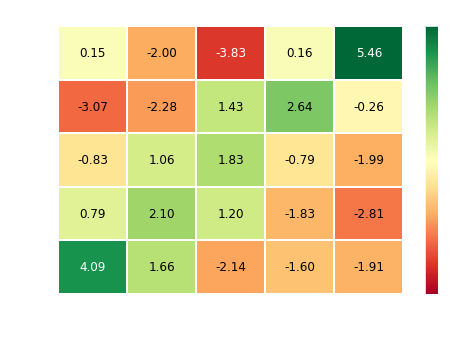

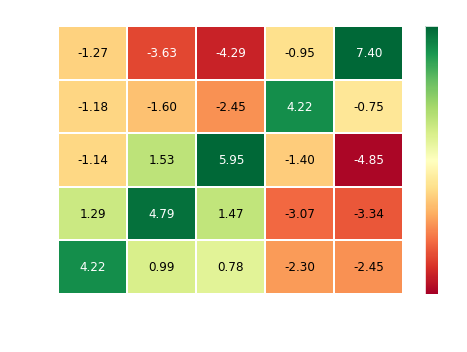

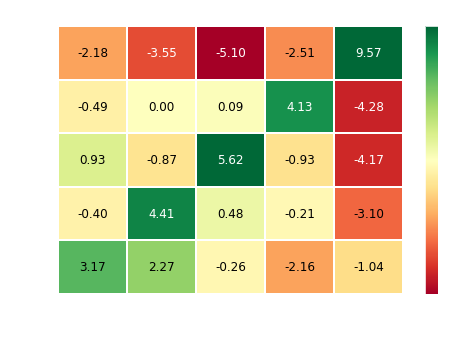

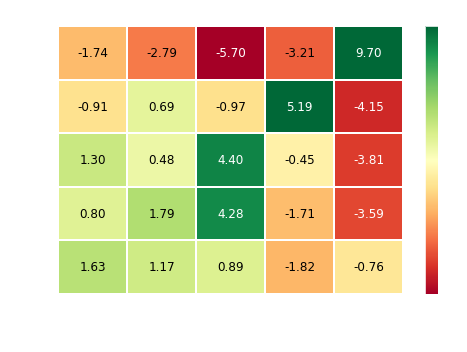

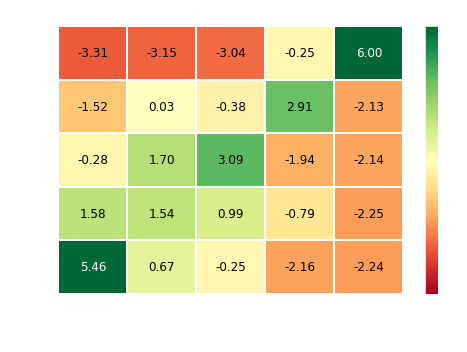

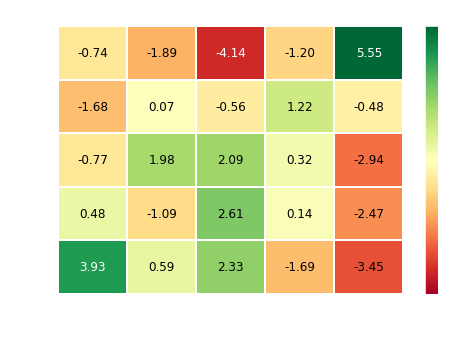

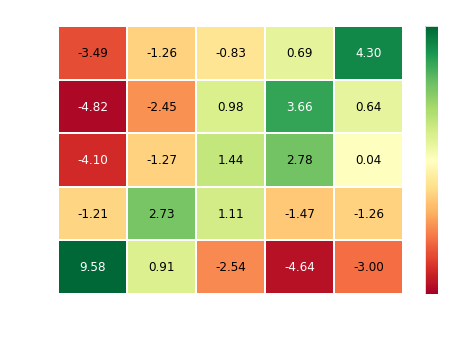

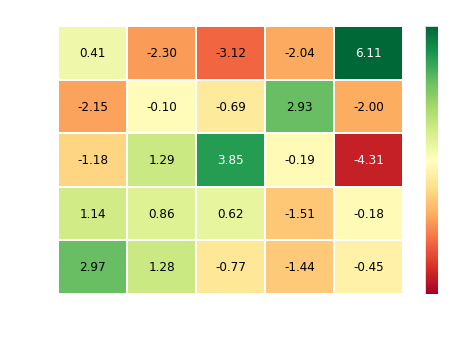

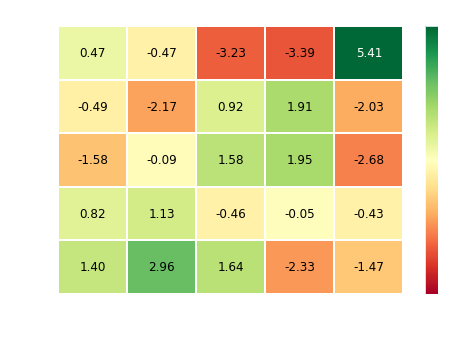

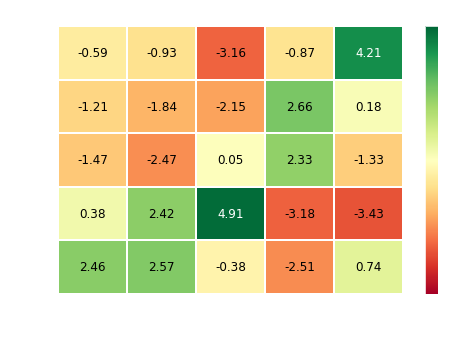

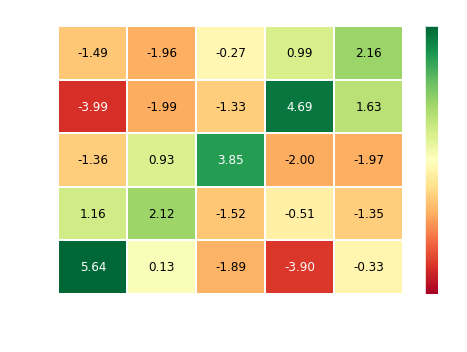

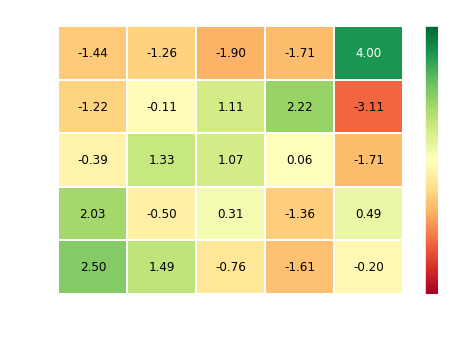

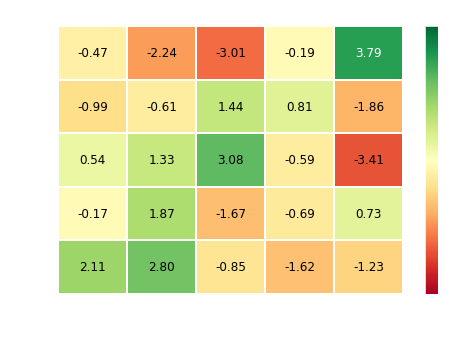

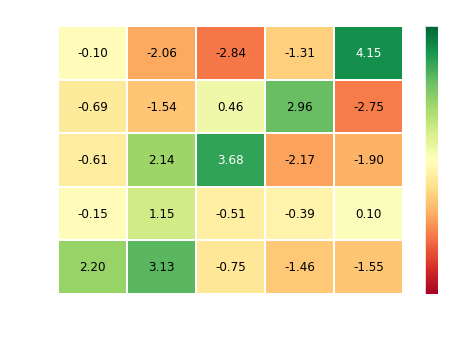

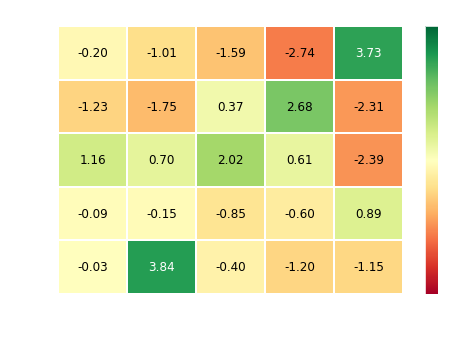

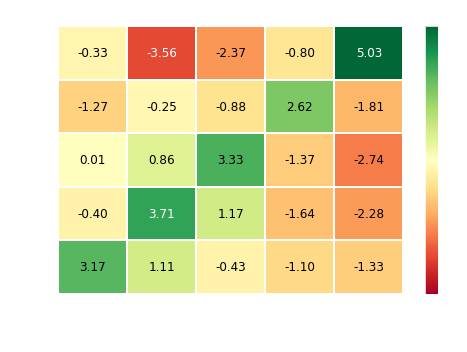

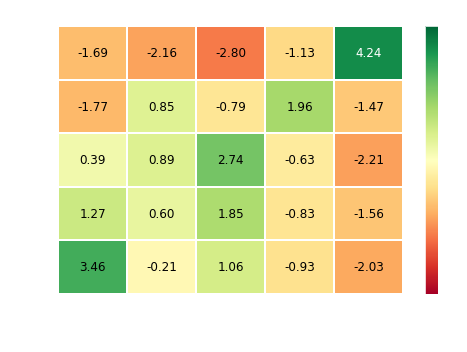

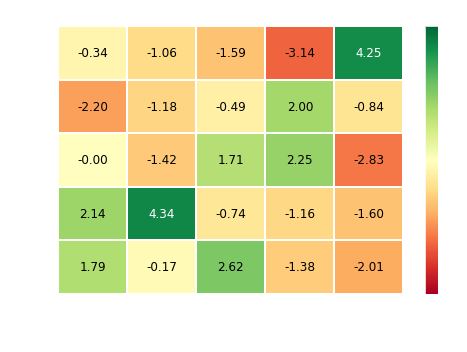

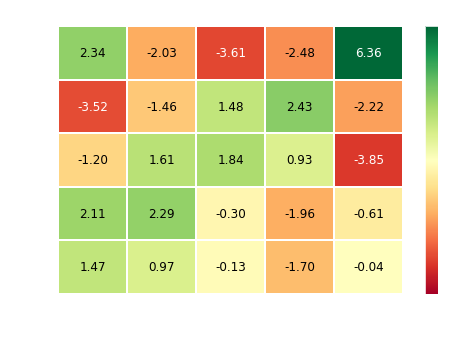

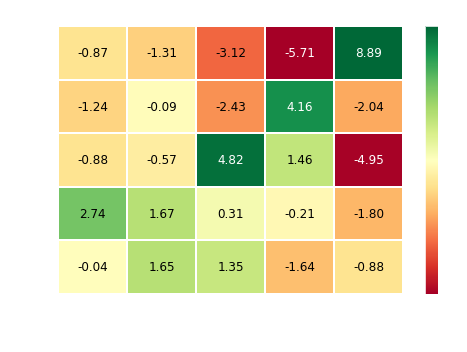

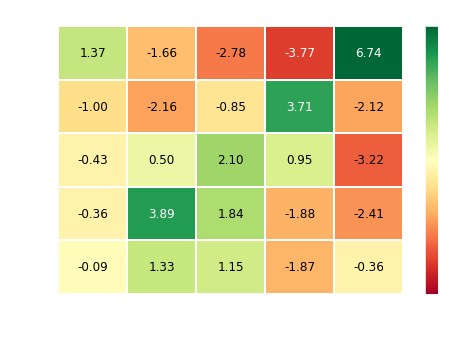

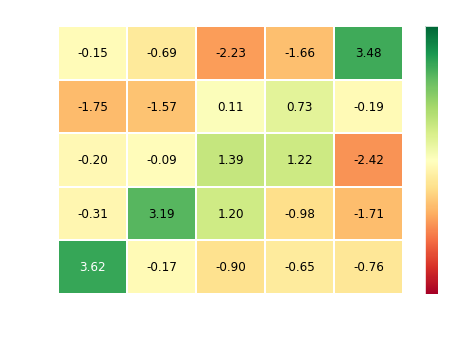

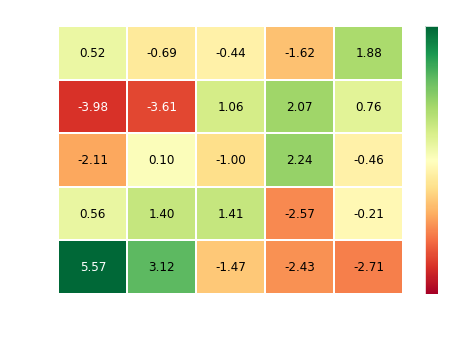

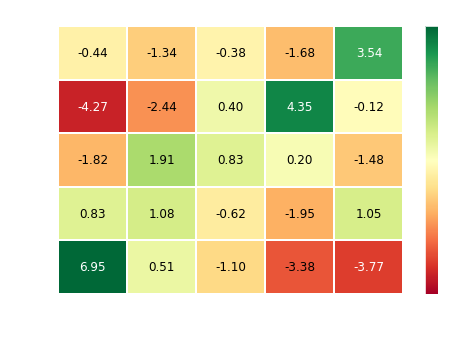

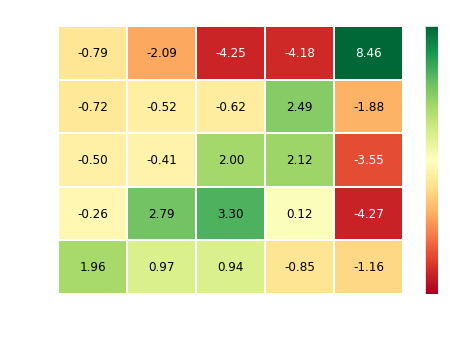

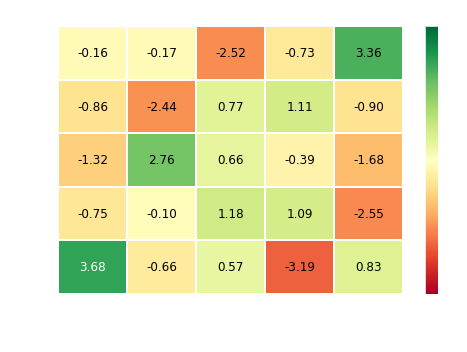

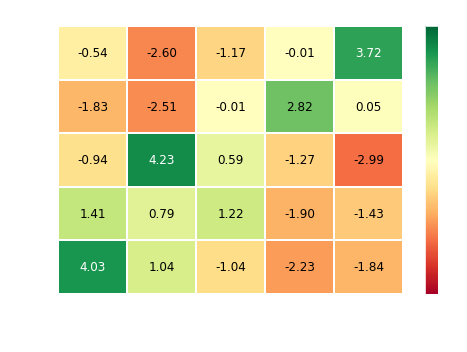

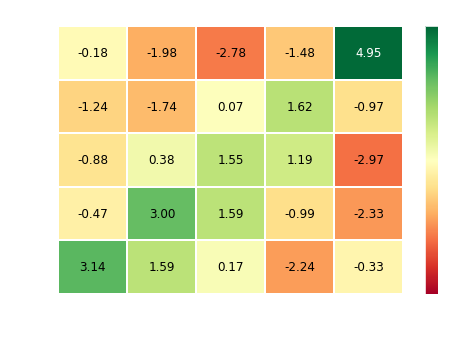

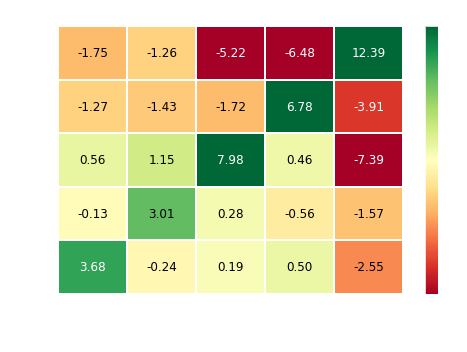

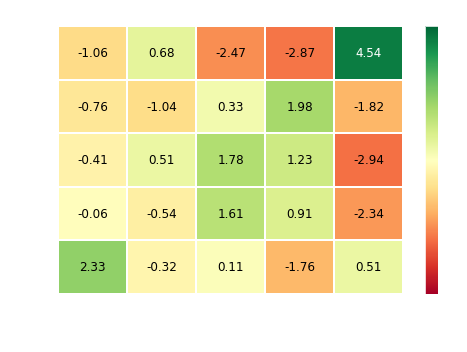

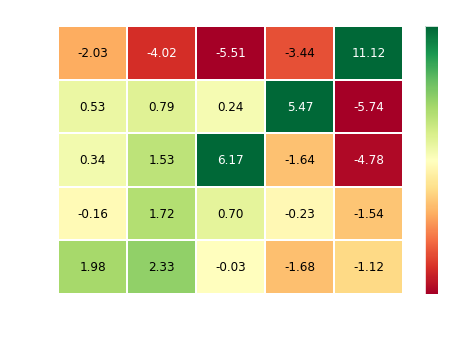

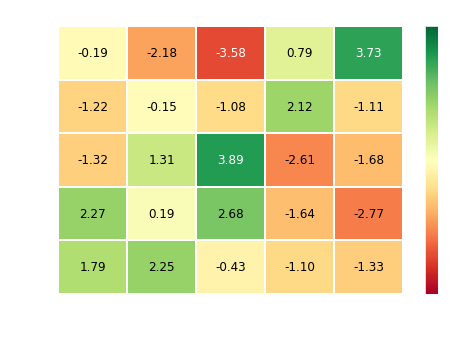

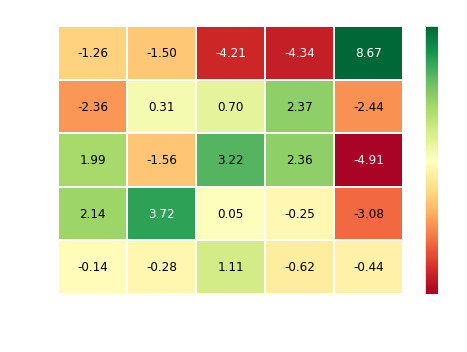

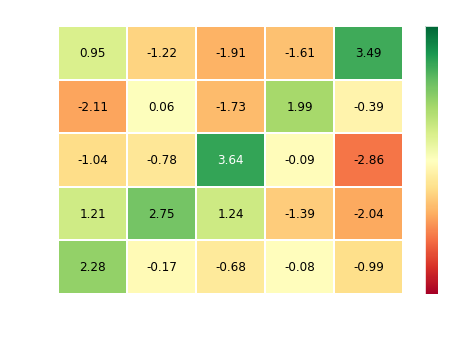

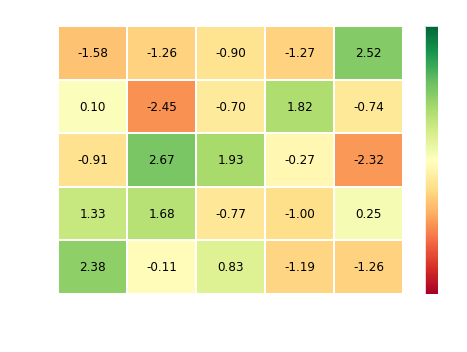

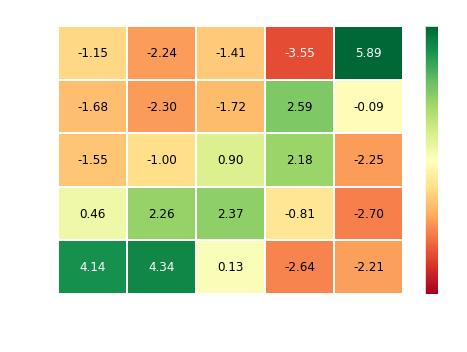

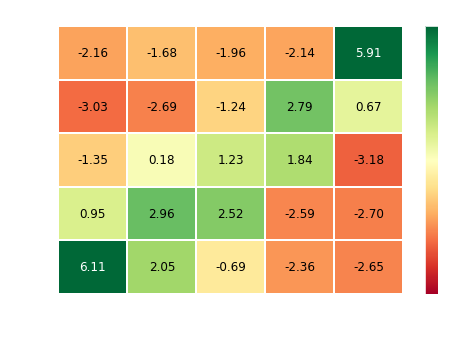

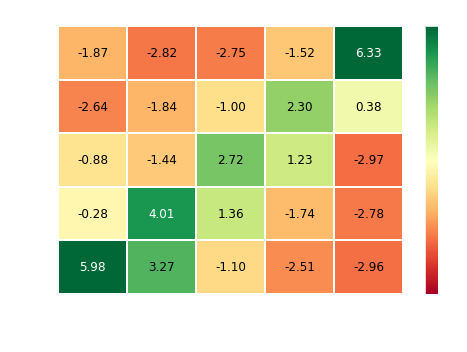

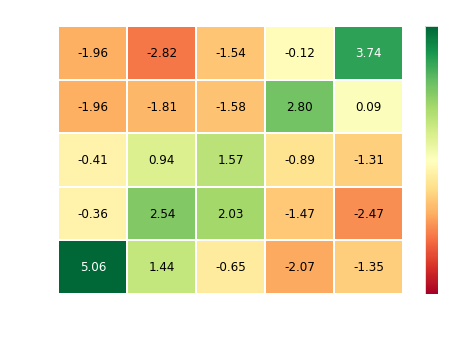

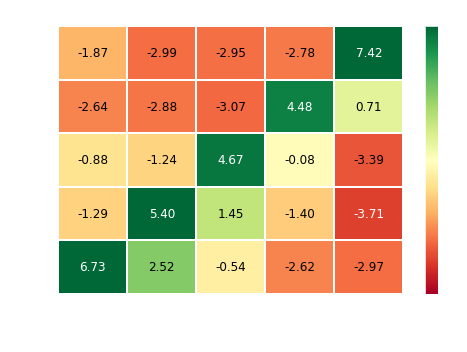

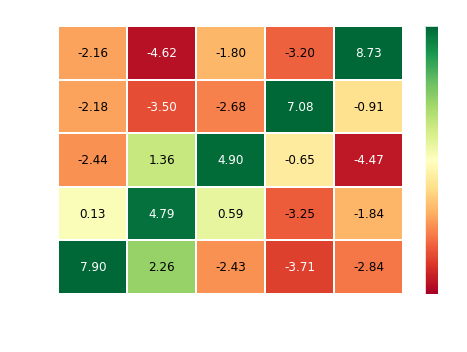

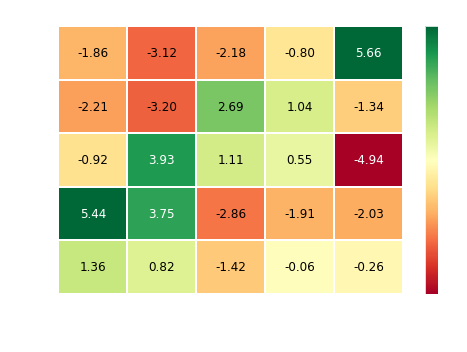

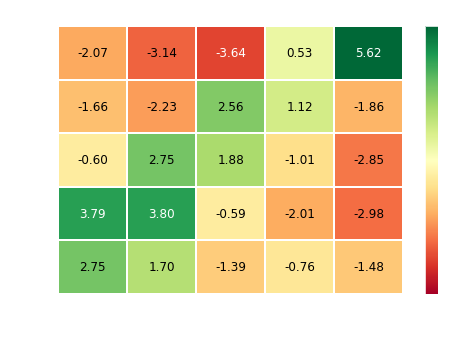

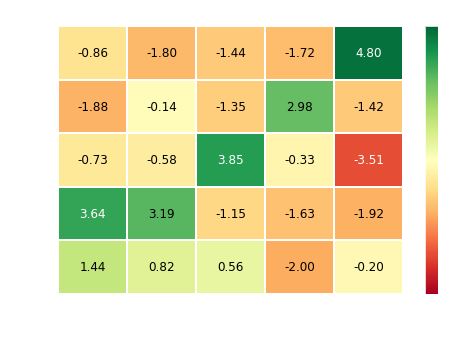

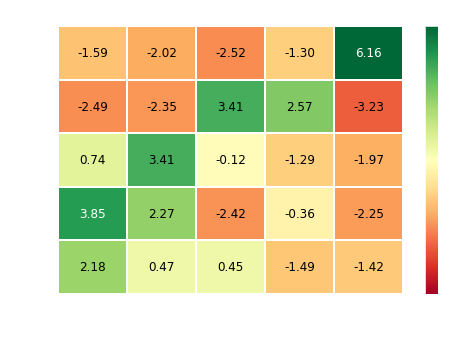

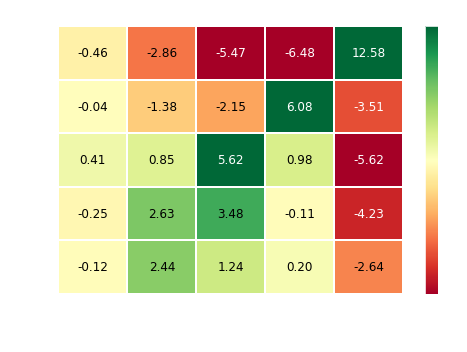

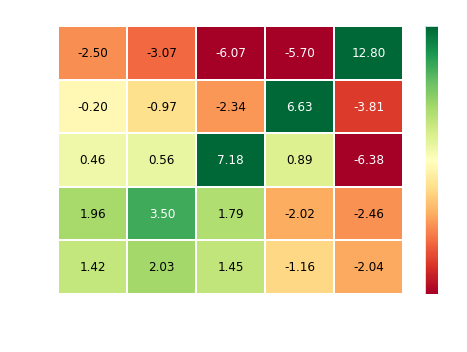

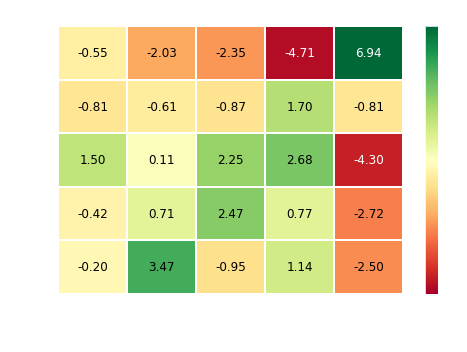

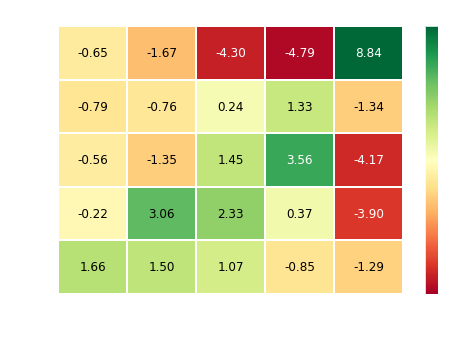

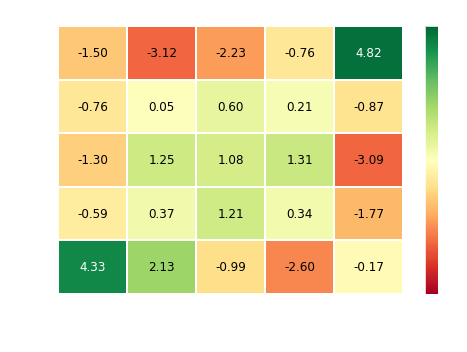

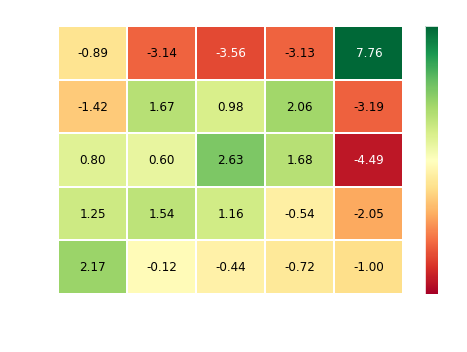

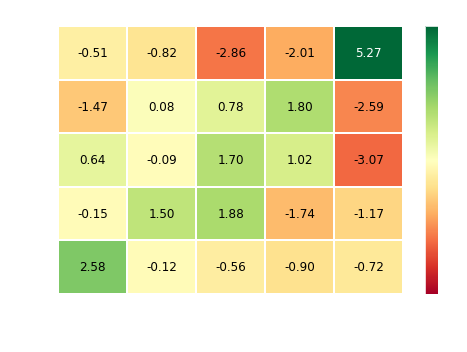

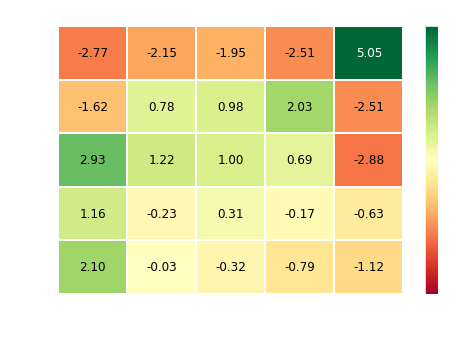

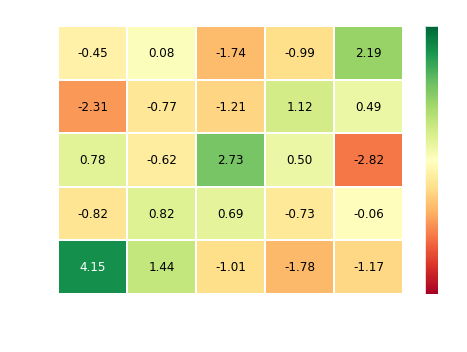

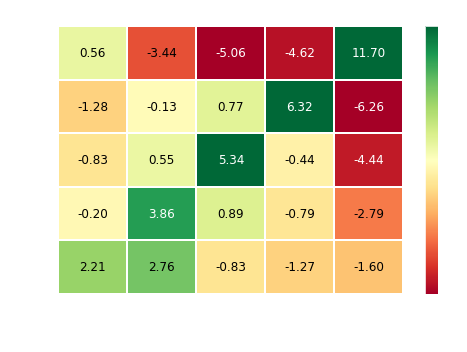

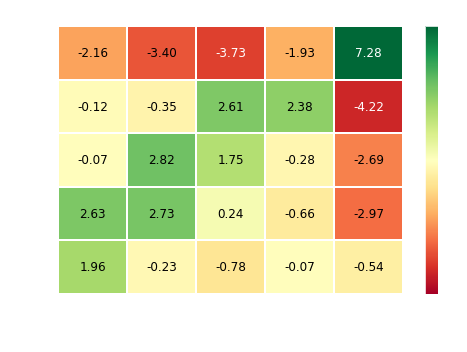

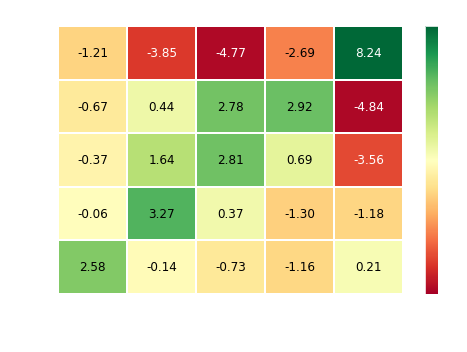

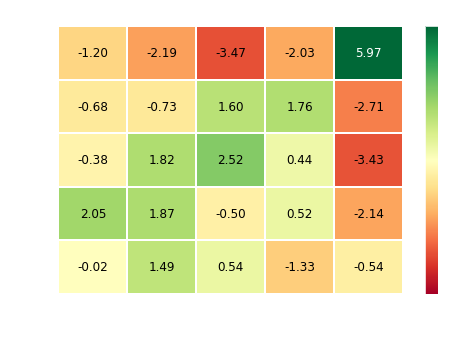

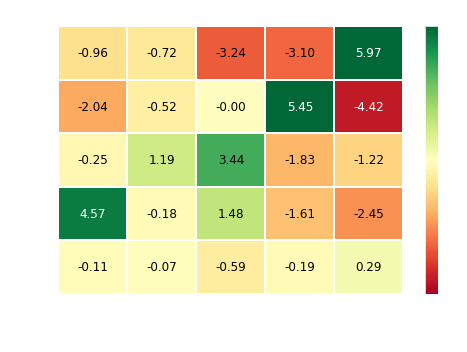

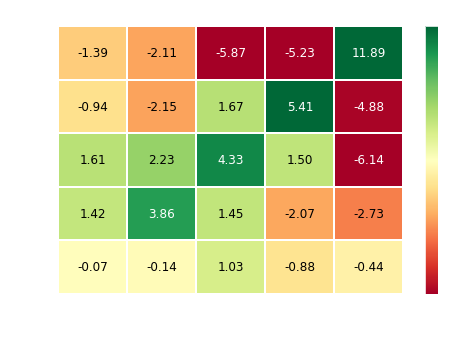

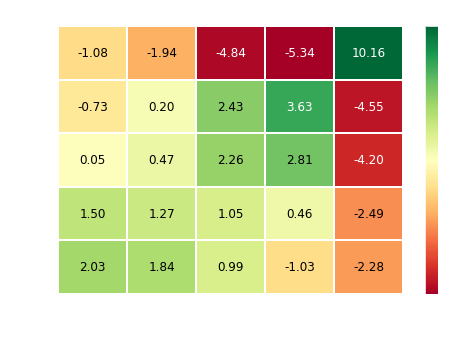

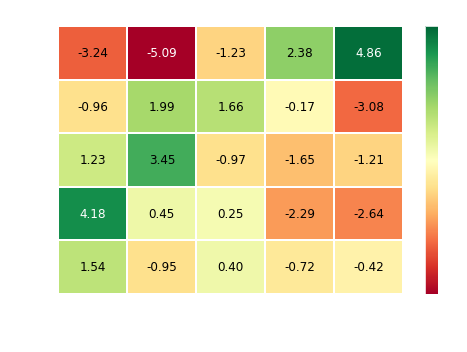

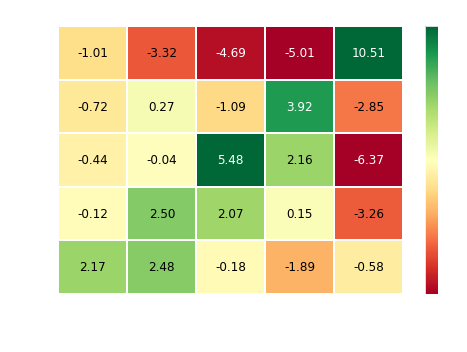

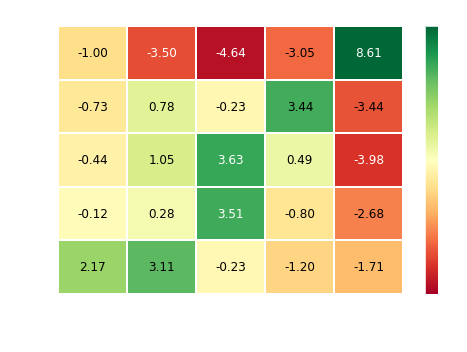

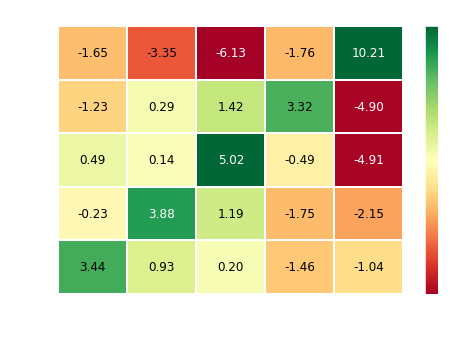

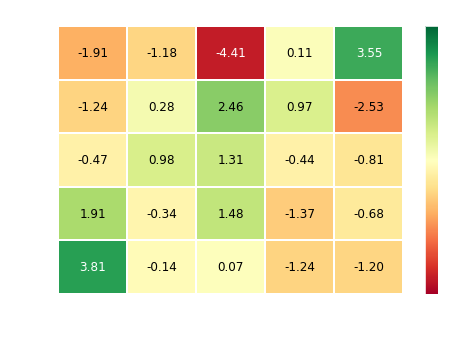

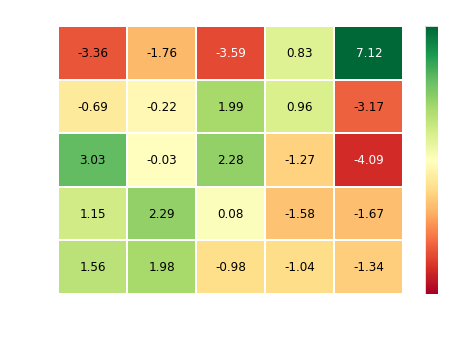

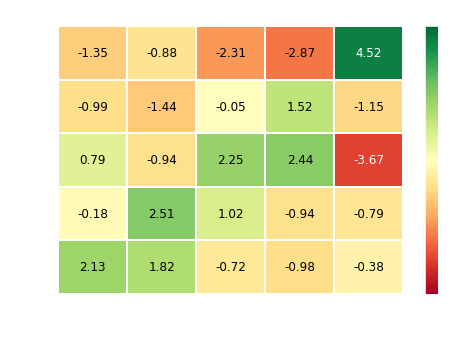

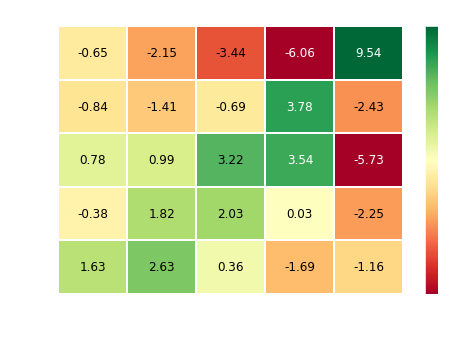

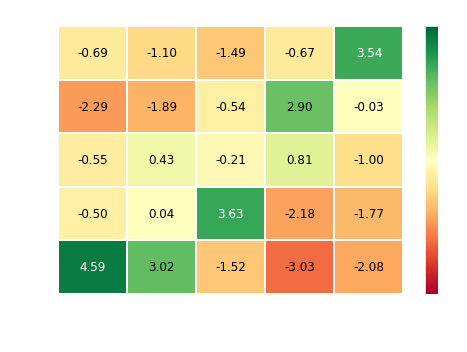

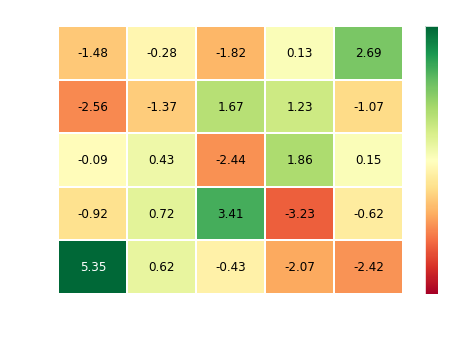

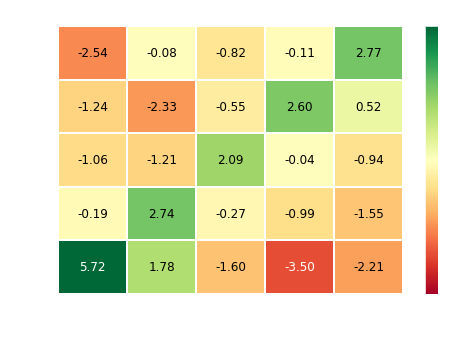

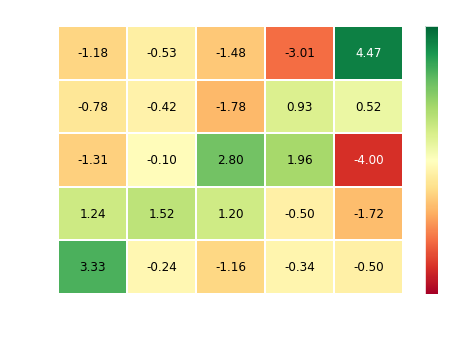

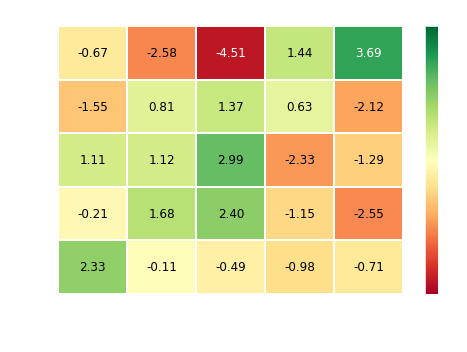

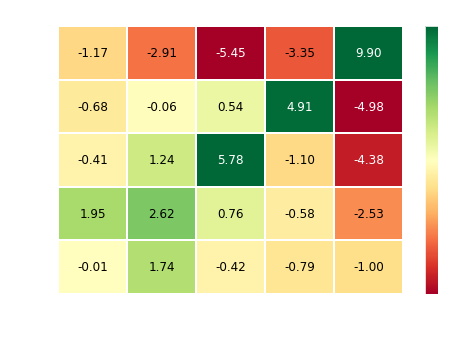

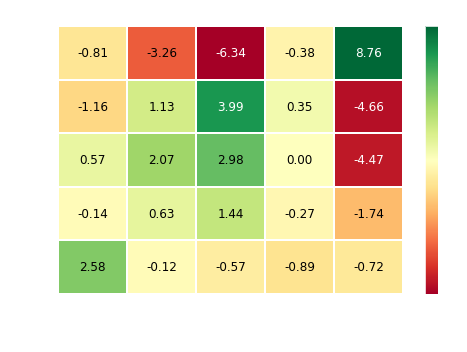

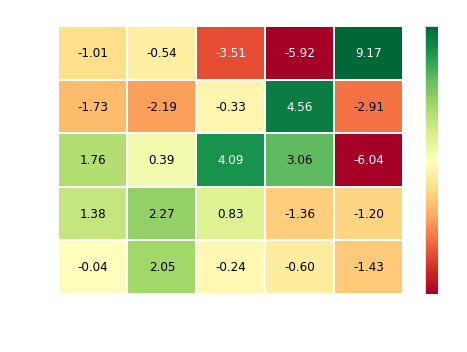

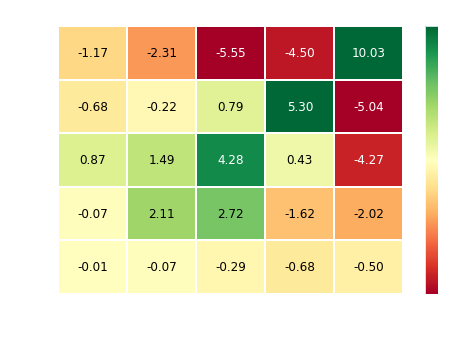

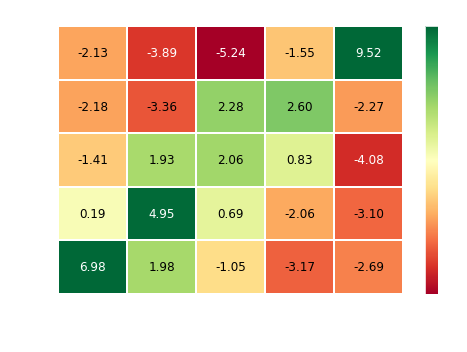

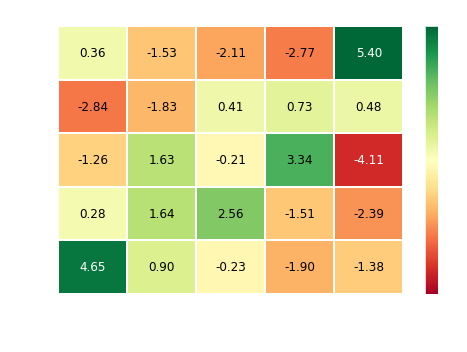

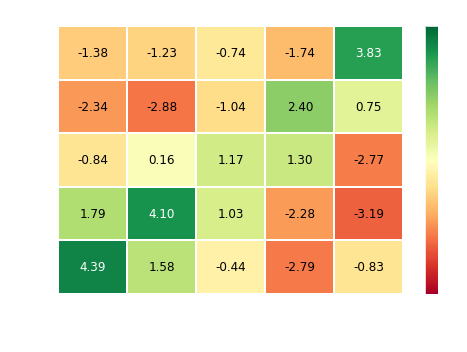

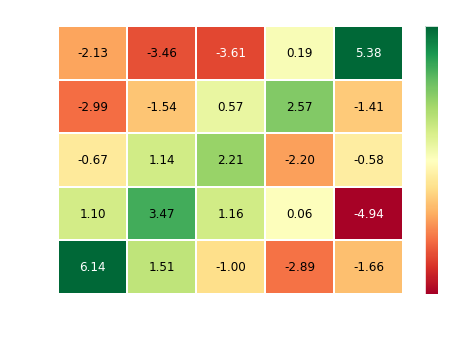

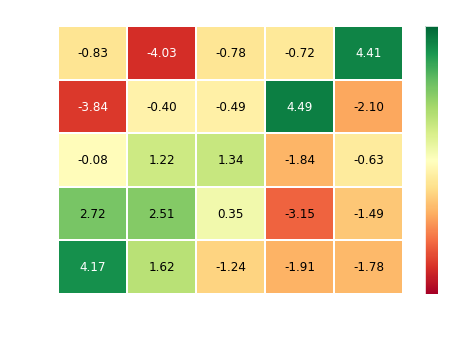

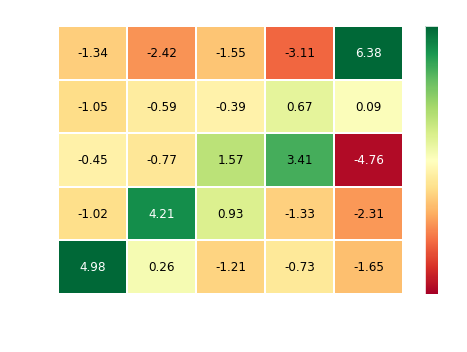

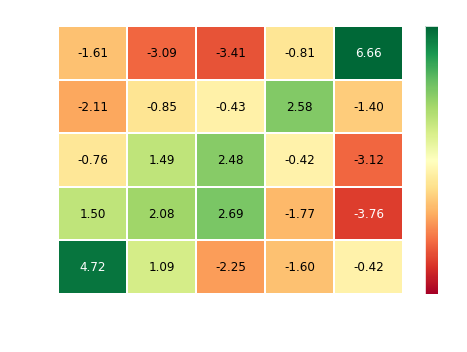

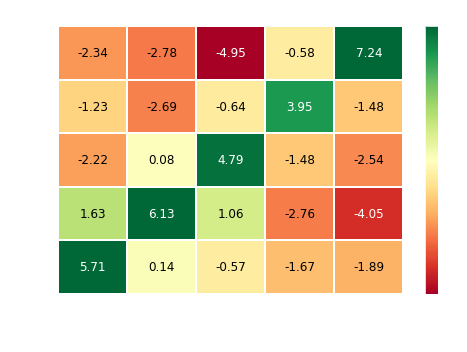

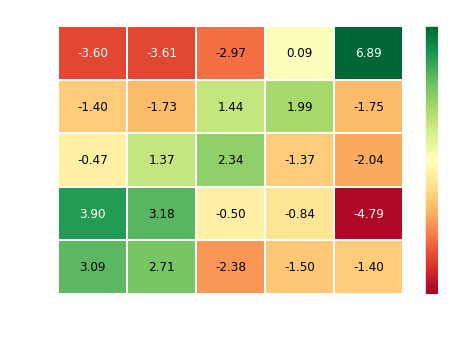

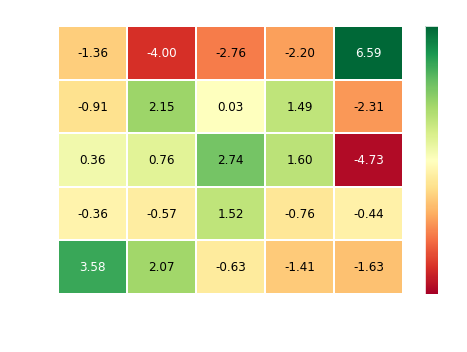

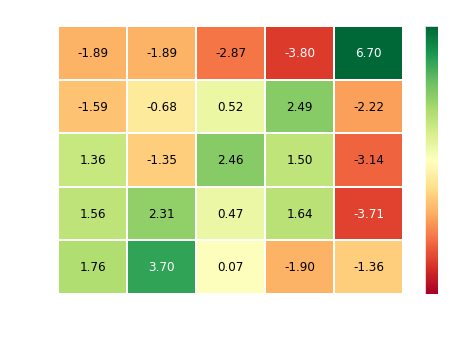

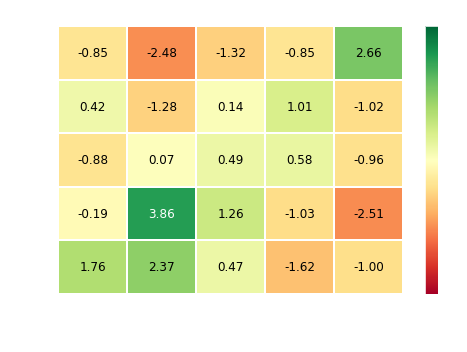

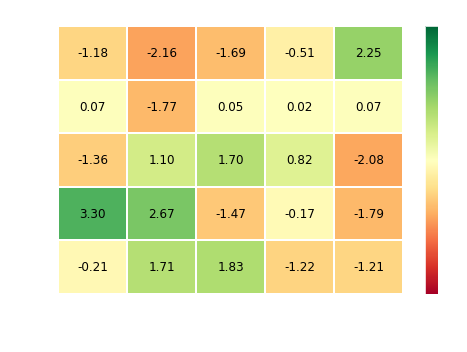

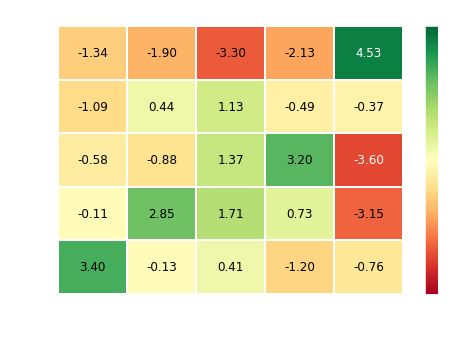

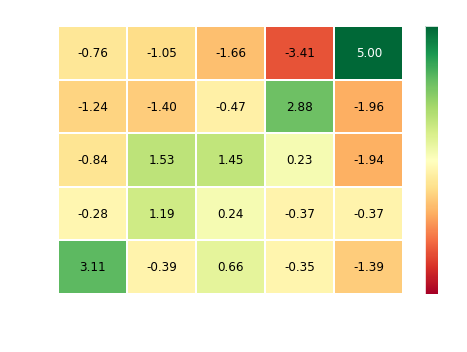

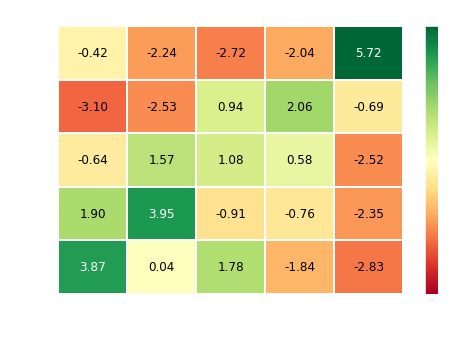

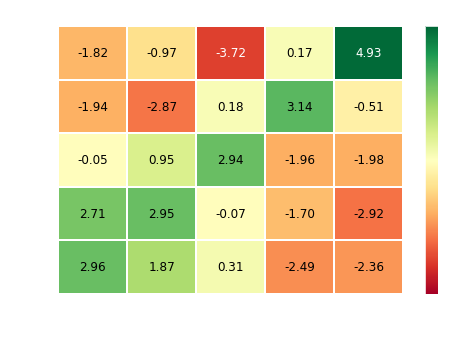

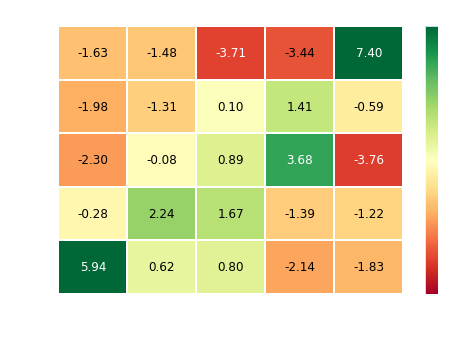

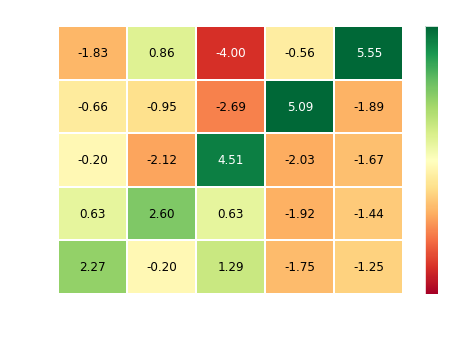

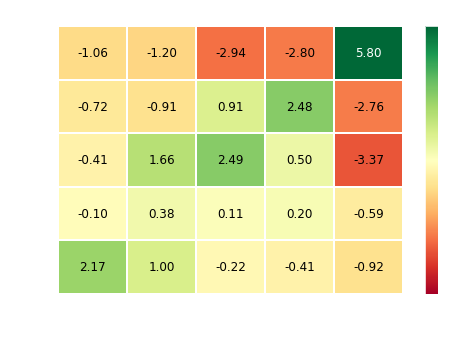

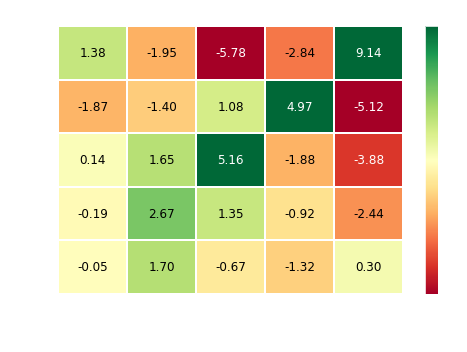

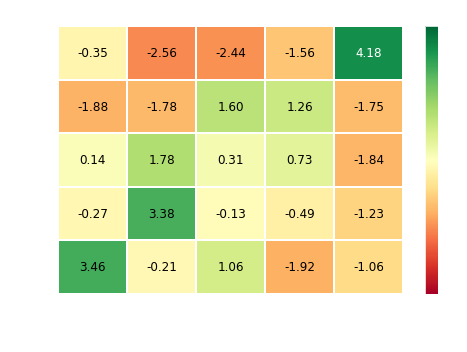

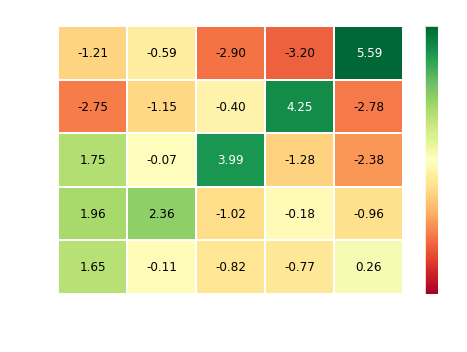

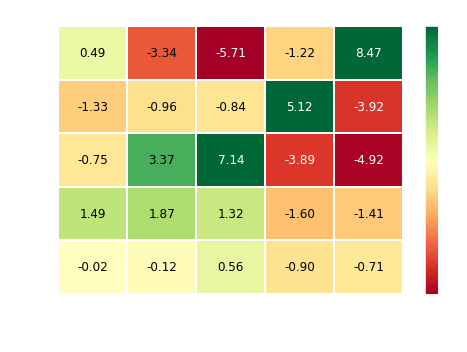

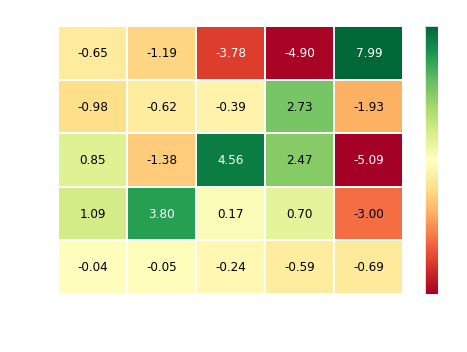

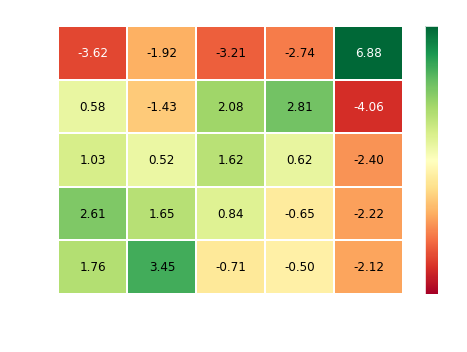

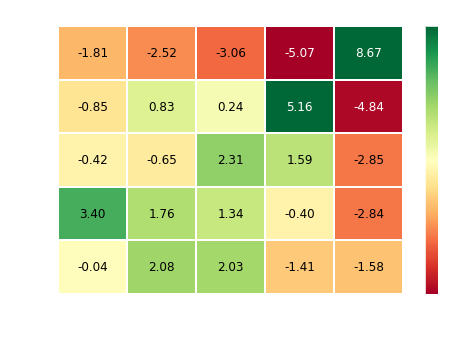

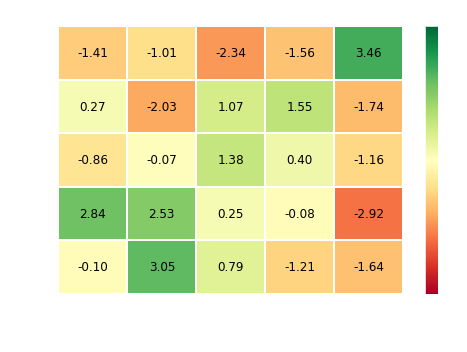

/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/outliers.py:433: UserWarning: Too few unique values for variable 6e (1) or inne.5 (3) to calculate outlier significances
  .format(c0, df_datahist.shape[0], c1, df_datahist.shape[1]))


AttributeError: 'float' object has no attribute 'columns'

In [7]:
report.correlation_report(df, pdf_file_name='./output/test.pdf')

In [8]:
df.significance_matix()

AttributeError: 'DataFrame' object has no attribute 'significance_matix'

In [9]:
df.phik_matrix(interval_cols={})


AssertionError: interval_cols is not a list.

In [10]:
df.phik_matrix(interval_cols=None)


interval_cols not set, guessing: ['1a', '1b', '1c ', '1d', 'komfort', '1f', '1g', '1h', 'zabytki', '1j', '1k', '1l', '1m', 'bezpieczeństwo', '1o', '1p', '1r', '2a', '2c', '2d', 'wiedza', '2f', '2g', '2h', '2i', '3a', '3b', '3c', '3d', '3e', '3f', '3h', '3i', '3j', '3k', '3l', '3m', '4a', '4b', '4c', '4d', '4e', 'czystość', '4g', '4h', '4i', '4j', '4k', '5a', '5b', '5c', '5d', '5e', '5g', '5h', '5i', '5j', '5k', '6a', '6b', '6c', '6d', '6e', 'atmosfera', '6g', '6h', '6i', '6j', '6k', '7a', '7b', '7c', '7d', '7f', '7g', '7h', '7i', '8a', '8b', '8c', 'czuję się zagubuiny', '8f', '8g', '8h', '8i', '8j', '8k', '8l', 'podróżuję by', '8n', '8o', '8p', '8r', '8s', 'bardziej uważnie', '8u', '8w', '8x', '8y', '8z', 'najniższa cena', '9a', '9b', '9c', '9d', '9e', 'rozumieją potrzeby', '9g', '9h', '9i', '9j', 'udzielam opinii', 'M1', 'M2a', 'M2b', 'M4a', 'm4b', 'M4c', 'M5a', 'M5b', 'M5c']


var2                       1a        1b       1c         1d        1f  \
var1                                                                    
1a                   1.000000  0.473062  0.169193  0.000000  0.123680   
1b                   0.473062  1.000000  0.000000  0.220199  0.179979   
1c                   0.169193  0.000000  1.000000  0.227919  0.224270   
1d                   0.000000  0.220199  0.227919  1.000000  0.123470   
1f                   0.123680  0.179979  0.224270  0.123470  1.000000   
1g                   0.361648  0.016569  0.211871  0.103159  0.303463   
1h                   0.158321  0.225269  0.250387  0.196637  0.123220   
1j                   0.184578  0.257670  0.056512  0.309867  0.314208   
1k                   0.257466  0.000000  0.719557  0.418826  0.180596   
1l                   0.192507  0.000000  0.000000  0.274571  0.367804   
1m                   0.000000  0.405639  0.024082  0.322149  0.466156   
1o                   0.209963  0.230692  0.107119  0.358883  0.185957   
1p                   0.059931  0.124682  0.285611  0.277512  0.558436   
1r                   0.000000  0.000000  0.322122  0.421372  0.247379   
2a                   0.292282  0.111441  0.224926  0.188330  0.384463   
2b                   0.000000  0.000000  0.149052  0.191022  0.000000   
2c                   0.312829  0.332804  0.125250  0.300930  0.321315   
2d                   0.167199  0.173555  0.377874  0.145440  0.221232   
2f                   0.123075  0.133331  0.000000  0.103314  0.311306   
2g                   0.159065  0.053543  0.141679  0.236771  0.161361   
2h                   0.332892  0.105010  0.252888  0.000000  0.378737   
2i                   0.155876  0.000000  0.000000  0.164055  0.000000   
3a                   0.330949  0.472982  0.080962  0.222314  0.131486   
3b                   0.102645  0.152969  0.219264  0.229167  0.160657   
3c                   0.582903  0.238978  0.309873  0.234072  0.171002   
3d                   0.146740  0.152872  0.156591  0.276060  0.441781   
3e                   0.152571  0.231950  0.000000  0.285745  0.607329   
3f                   0.130959  0.751453  0.111712  0.271319  0.237198   
3h                   0.227683  0.218590  0.187309  0.225442  0.312664   
3i                   0.042144  0.000000  0.309424  0.438084  0.258744   
...                       ...       ...       ...       ...       ...   
8z                   0.288338  0.068871  0.175397  0.000000  0.245801   
9a                   0.000000  0.176890  0.103240  0.241589  0.000000   
9b                   0.168488  0.000000  0.000000  0.243151  0.198944   
9c                   0.300985  0.134669  0.000000  0.226358  0.000000   
9d                   0.129316  0.260681  0.099183  0.166337  0.060839   
9e                   0.185315  0.061806  0.119881  0.000000  0.311920   
9g                   0.177755  0.021097  0.224866  0.000000  0.244573   
9h                   0.166079  0.064526  0.144657  0.071432  0.284673   
9i                   0.158828  0.000000  0.073794  0.000000  0.294815   
9j                   0.157352  0.000000  0.171152  0.120948  0.227563   
M1                   0.000000  0.000000  0.022188  0.000000  0.145476   
M3                   0.060273  0.092460  0.630191  0.201723  0.224175   
atmosfera            0.294694  0.000000  0.139478  0.264573  0.029201   
bardziej uważnie     0.000000  0.171599  0.000000  0.235533  0.288119   
bezpieczeństwo       0.316178  0.190001  0.160786  0.305007  0.243447   
czuję się zagubuiny  0.174679  0.134114  0.238090  0.163619  0.314308   
czystość             0.351196  0.000000  0.000000  0.368223  0.114120   
inne                 0.324076  0.640916  0.000000  0.000000  0.572679   
inne.1               0.513881  0.691549  0.709410  0.867765  0.000000   
inne.2               0.000000  0.081350  0.000000  0.000000  0.000000   
inne.3               0.000000  0.000000  0.570520  0.858101  1.000000   
inne.4               0.000000  0.000000  0.160873  0.74166

interval_cols not set, guessing: ['1a', '1b', '1c ', '1d', 'komfort', '1f', '1g', '1h', 'zabytki', '1j', '1k', '1l', '1m', 'bezpieczeństwo', '1o', '1p', '1r', '2a', '2c', '2d', 'wiedza', '2f', '2g', '2h', '2i', '3a', '3b', '3c', '3d', '3e', '3f', '3h', '3i', '3j', '3k', '3l', '3m', '4a', '4b', '4c', '4d', '4e', 'czystość', '4g', '4h', '4i', '4j', '4k', '5a', '5b', '5c', '5d', '5e', '5g', '5h', '5i', '5j', '5k', '6a', '6b', '6c', '6d', '6e', 'atmosfera', '6g', '6h', '6i', '6j', '6k', '7a', '7b', '7c', '7d', '7f', '7g', '7h', '7i', '8a', '8b', '8c', 'czuję się zagubuiny', '8f', '8g', '8h', '8i', '8j', '8k', '8l', 'podróżuję by', '8n', '8o', '8p', '8r', '8s', 'bardziej uważnie', '8u', '8w', '8x', '8y', '8z', 'najniższa cena', '9a', '9b', '9c', '9d', '9e', 'rozumieją potrzeby', '9g', '9h', '9i', '9j', 'udzielam opinii', 'M1', 'M2a', 'M2b', 'M4a', 'm4b', 'M4c', 'M5a', 'M5b', 'M5c']


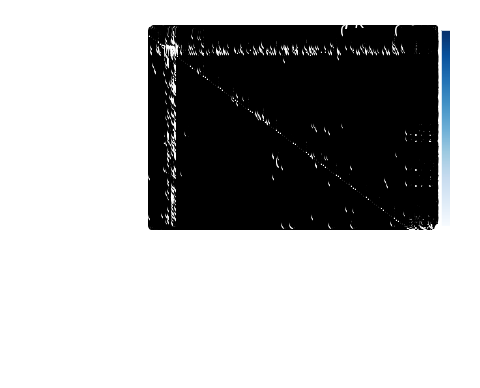

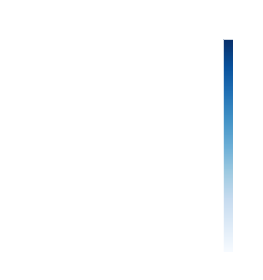

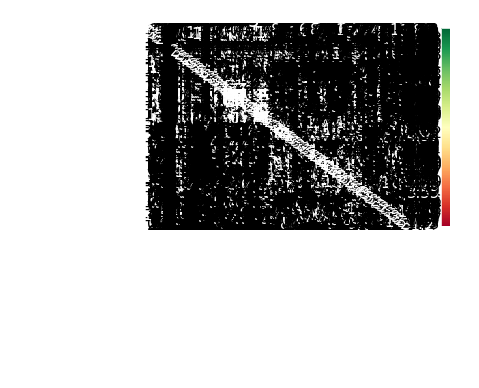

(var2                       1a        1b       1c         1d        1f  \
 var1                                                                    
 1a                   1.000000  0.473062  0.169193  0.000000  0.123680   
 1b                   0.473062  1.000000  0.000000  0.220199  0.179979   
 1c                   0.169193  0.000000  1.000000  0.227919  0.224270   
 1d                   0.000000  0.220199  0.227919  1.000000  0.123470   
 1f                   0.123680  0.179979  0.224270  0.123470  1.000000   
 1g                   0.361648  0.016569  0.211871  0.103159  0.303463   
 1h                   0.158321  0.225269  0.250387  0.196637  0.123220   
 1j                   0.184578  0.257670  0.056512  0.309867  0.314208   
 1k                   0.257466  0.000000  0.719557  0.418826  0.180596   
 1l                   0.192507  0.000000  0.000000  0.274571  0.367804   
 1m                   0.000000  0.405639  0.024082  0.322149  0.466156   
 1o                   0.209963  0.2306

In [11]:
report.correlation_report(df, pdf_file_name='./output/test.pdf', do_outliers=False)


In [12]:
cor=df.phik_matrix(interval_cols=None)
type(cor)


interval_cols not set, guessing: ['1a', '1b', '1c ', '1d', 'komfort', '1f', '1g', '1h', 'zabytki', '1j', '1k', '1l', '1m', 'bezpieczeństwo', '1o', '1p', '1r', '2a', '2c', '2d', 'wiedza', '2f', '2g', '2h', '2i', '3a', '3b', '3c', '3d', '3e', '3f', '3h', '3i', '3j', '3k', '3l', '3m', '4a', '4b', '4c', '4d', '4e', 'czystość', '4g', '4h', '4i', '4j', '4k', '5a', '5b', '5c', '5d', '5e', '5g', '5h', '5i', '5j', '5k', '6a', '6b', '6c', '6d', '6e', 'atmosfera', '6g', '6h', '6i', '6j', '6k', '7a', '7b', '7c', '7d', '7f', '7g', '7h', '7i', '8a', '8b', '8c', 'czuję się zagubuiny', '8f', '8g', '8h', '8i', '8j', '8k', '8l', 'podróżuję by', '8n', '8o', '8p', '8r', '8s', 'bardziej uważnie', '8u', '8w', '8x', '8y', '8z', 'najniższa cena', '9a', '9b', '9c', '9d', '9e', 'rozumieją potrzeby', '9g', '9h', '9i', '9j', 'udzielam opinii', 'M1', 'M2a', 'M2b', 'M4a', 'm4b', 'M4c', 'M5a', 'M5b', 'M5c']


pandas.core.frame.DataFrame

In [13]:
cor.to_csv('./output/cor.csv')


In [14]:
sig=df.significance_matix(interval_cols=None)
sig.to_csv('./output/sig.csv')


AttributeError: 'DataFrame' object has no attribute 'significance_matix'

In [15]:
sig=df.significance_matix()
sig.to_csv('./output/sig.csv')


AttributeError: 'DataFrame' object has no attribute 'significance_matix'

In [16]:
import phik
from phik import resources, report


In [17]:
sig=df.significance_matix()
sig.to_csv('./output/sig.csv')


AttributeError: 'DataFrame' object has no attribute 'significance_matix'

In [18]:
df.significance_matix()
#sig.to_csv('./output/sig.csv')


AttributeError: 'DataFrame' object has no attribute 'significance_matix'

In [19]:
sig=df.significance_matix(interval_cols=None)
sig.to_csv('./output/sig.csv')


AttributeError: 'DataFrame' object has no attribute 'significance_matix'